In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 49kB/s 
     |████████████████████████████████| 419kB 48.1MB/s 
     |████████████████████████████████| 3.0MB 43.5MB/s 


In [8]:
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 377.0MB 43kB/s 
     |████████████████████████████████| 3.2MB 37.6MB/s 
     |████████████████████████████████| 491kB 45.9MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow-gpu 2.0.0a0
    Uninstalling tensorflow-gpu-2.0.0a0:
      Successfully uninstalled tensorflow-gpu-2.0.0a0


In [9]:
!pip install tensorflow-gpu==2.0.0.alpha0

  Using cached https://files.pythonhosted.org/packages/1a/66/32cffad095253219d53f6b6c2a436637bbe45ac4e7be0244557210dc3918/tensorflow_gpu-2.0.0a0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: tensorflow-gpu 1.14.0
    Uninstalling tensorflow-gpu-1.14.0:
      Successfully uninstalled tensorflow-gpu-1.14.0


In [12]:
!pip install tensorflow

     |████████████████████████████████| 516.2MB 25kB/s 
     |████████████████████████████████| 3.0MB 2.6MB/s 
     |████████████████████████████████| 460kB 46.0MB/s 
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tf.__version__

'2.2.0'

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape


(10000, 28, 28)

In [0]:
i = random.randint(1,60000)

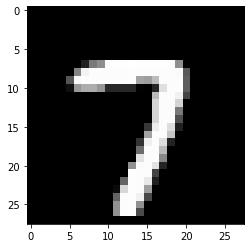

In [7]:
plt.imshow( X_train[i] , cmap = 'gray')

In [8]:
label = y_train[i]
label

7

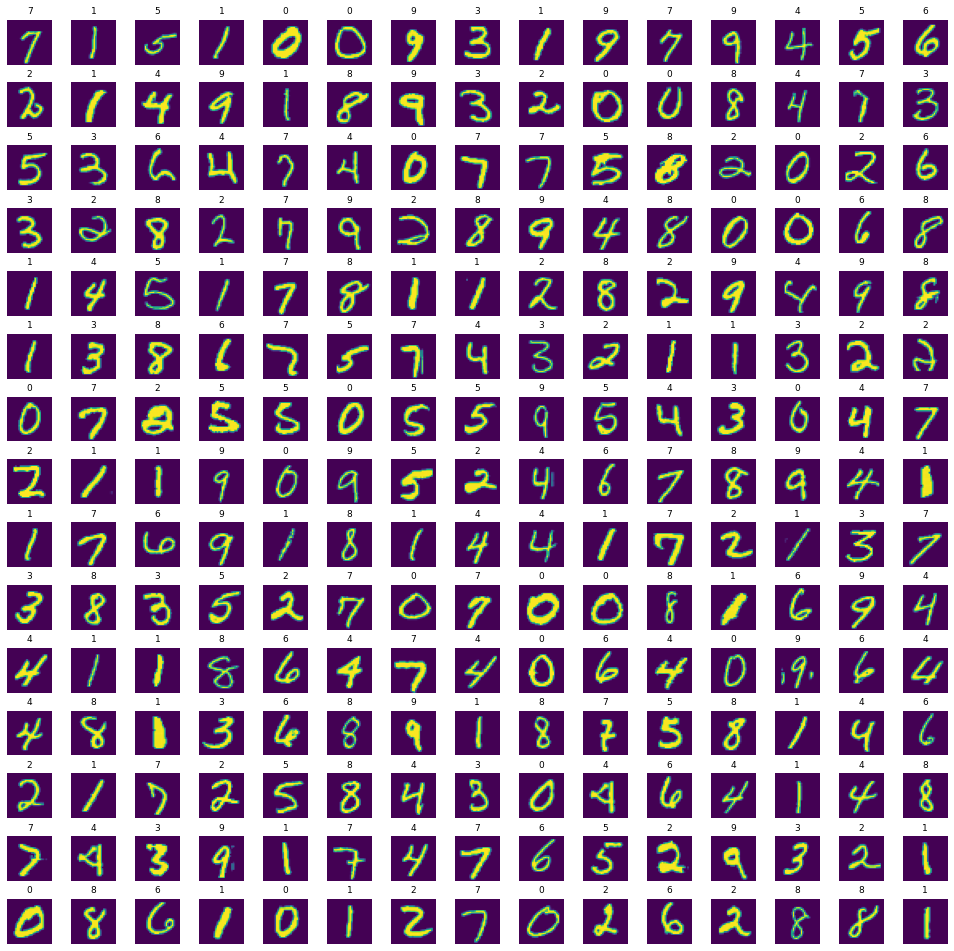

In [10]:
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
added_noise = np.random.randn(*(28,28))

In [13]:
added_noise.shape

(28, 28)

In [0]:
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))

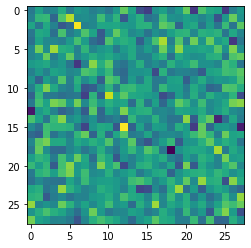

In [17]:
plt.imshow(added_noise)

In [0]:
noise_factor = 0.2
sample_image = X_train[101]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

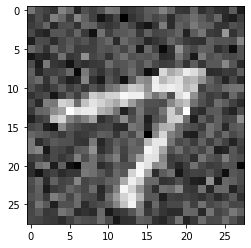

In [19]:
plt.imshow(noisy_sample_image, cmap="gray")

In [20]:
noisy_sample_image.max()

1.3003958865698144

In [21]:
noisy_sample_image.min()

-0.5511516515211067

In [0]:
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)

In [23]:
noisy_sample_image.max()

1.0

In [24]:
noisy_sample_image.min()

0.0

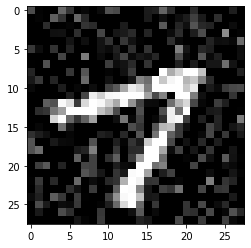

In [25]:
plt.imshow(noisy_sample_image, cmap="gray")

In [0]:
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)

In [0]:
X_train_noisy

In [0]:
X_train_noisy = np.array(X_train_noisy)

In [29]:
X_train_noisy.shape

(60000, 28, 28)

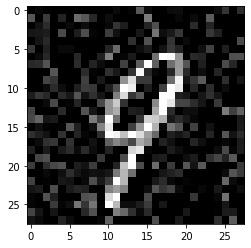

In [30]:
plt.imshow(X_train_noisy[22], cmap="gray")

In [0]:
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)

# Convert from list to array
X_test_noisy = np.array(X_test_noisy)

In [32]:
X_test_noisy.shape

(10000, 28, 28)

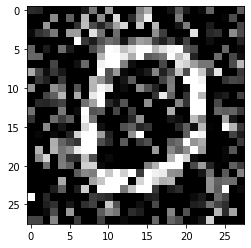

In [33]:
plt.imshow(X_test_noisy[10], cmap = 'gray')

In [0]:
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8,(3,3), strides=1, padding="same"))

autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
# autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, activation='sigmoid', padding="same"))

In [36]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         5

In [37]:
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),          
          X_train.reshape(-1, 28, 28, 1), 
          epochs=10, 
          batch_size=200)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2184
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1078
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1001
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0964
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0937
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0915
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0898
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0885
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0875
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0867


In [0]:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

In [39]:
denoised_images.shape

(15, 28, 28, 1)

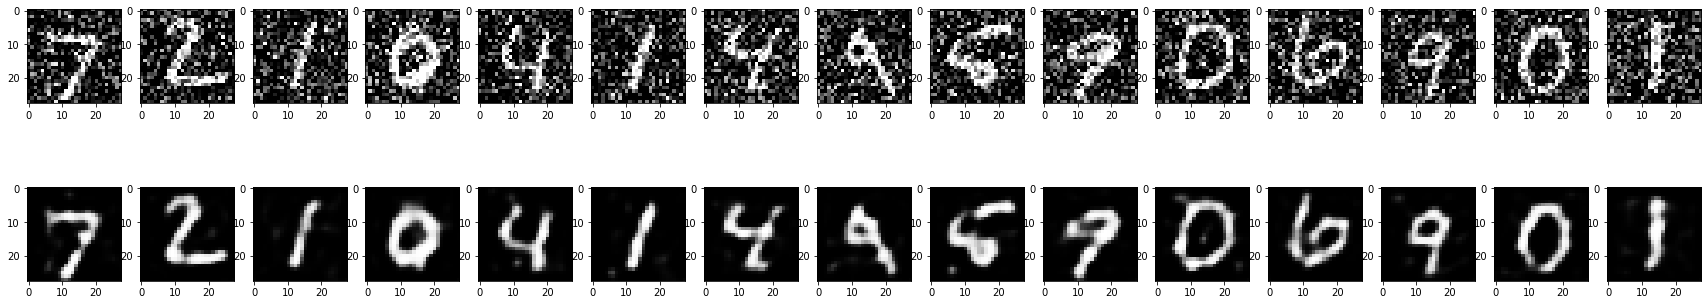

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')